## 아파트 실거래가 (공공데이터) 시각화

In [128]:
import glob, os

from tqdm.notebook import trange, tqdm

import pandas as pd
import numpy as np

## 메타 데이터 로드

In [105]:
districtCodeHPath = './dataset/district_code_h.csv'
districtCodeBPath = './dataset/district_code_b.csv'

dfDistrictCodeH = pd.read_csv(
    districtCodeHPath, 
    encoding = 'UTF-8')

dfDistrictCodeB = pd.read_csv(
    districtCodeBPath, 
    encoding = 'UTF-8').query("폐지여부 == False")

In [106]:
dfDistrictCodeB.query("""
(법정동.str.contains("마장동") or 법정동.str.contains("청량리") or 법정동.str.contains("답십리"))
""")

,법정동코드,법정동,폐지여부,p_ymd
290,1120010500,서울특별시 성동구 마장동,False,20200117
369,1123010500,서울특별시 동대문구 답십리동,False,20200117
371,1123010700,서울특별시 동대문구 청량리동,False,20200117
11923,4272034026,강원도 홍천군 서석면 청량리,False,20200117
23001,4518037022,전라북도 정읍시 이평면 청량리,False,20200117
23805,4573032023,전라북도 무주군 설천면 청량리,False,20200117


## 아파트 실거래가 데이터 로드

In [26]:
p_ym = '201912'
aptTradePath = './dataset/apt-trade/{}/*.csv'.format(p_ym)

dfAptTrade = pd.concat(map(pd.read_csv, glob.glob(aptTradePath)))

In [118]:
dfAptTradeTarget = dfAptTrade.query("""
지역코드 == [11200, 11230]
""")
dfAptTradeTarget

,법정동,지역코드,아파트,지번,년,월,일,건축년도,전용면적,층,거래금액,거래일,p_ymd
0,상왕십리동,11200,텐즈힐(2구역),811,2019,12,1,2014,84.900,16,128000,2019-12-01,20200118
1,상왕십리동,11200,텐즈힐(2구역),811,2019,12,2,2014,127.440,24,142500,2019-12-02,20200118
2,상왕십리동,11200,텐즈힐(2구역),811,2019,12,5,2014,84.950,3,130500,2019-12-05,20200118
3,하왕십리동,11200,금호베스트빌,1052,2019,12,1,2001,59.790,1,54000,2019-12-01,20200118
4,하왕십리동,11200,텐즈힐아파트(1단지),1066,2019,12,1,2015,59.880,11,120000,2019-12-01,20200118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,이문동,11230,신이문 금호어울림,428,2019,12,19,2008,59.920,5,55500,2019-12-19,20200118
299,이문동,11230,쌍용,64,2019,12,20,2000,59.990,23,53400,2019-12-20,20200118
300,이문동,11230,대림e-편한세상,225,2019,12,21,2003,84.972,16,74500,2019-12-21,20200118
301,이문동,11230,쌍용,64,2019,12,21,2000,114.350,12,68000,2019-12-21,20200118


In [123]:
# 해당 기간 내 법정동 별 거래 금액
dfAptTradeTarget[['법정동', '지역코드', '거래금액']] \
    .groupby(['법정동', '지역코드']) \
    .agg(['count', 'sum', 'max', 'min', 'mean']) \
    .sort_values([('거래금액', 'count')], ascending=False) \
    .head(5)

거래금액                                       
            count      sum     max    min           mean
법정동   지역코드                                              
장안동   11230   109  4142690   86000   9750   38006.330275
행당동   11200    59  5445800  158000  58300   92301.694915
답십리동  11230    54  3300150  149000  13500   61113.888889
하왕십리동 11200    47  4851100  173000  54000  103214.893617
전농동   11230    44  4069180  143000  34500   92481.363636

In [124]:
# 해당 기간 내 전용 면적 별 거래 금액
dfAptTradeTarget[['전용면적', '거래금액']] \
    .groupby(['전용면적']) \
    .agg(['count', 'sum', 'max', 'min', 'mean']) \
    .sort_values([('거래금액', 'count')], ascending=False) \
    .head(5)
    

거래금액                                       
      count      sum     max    min           mean
전용면적                                              
13.08    23   228250    9950   9750    9923.913043
59.96    22  1549900   83000  50700   70450.000000
84.98    21  2269100  158000  50500  108052.380952
59.99    19  1737000  110000  52000   91421.052632
84.87    14  1146450  131000  62700   81889.285714

In [126]:
# 해당 기간 내 전용 면적 별 거래 금액
dfAptTradeTarget[['건축년도', '거래금액']] \
    .groupby(['건축년도']) \
    .agg(['count', 'sum', 'max', 'min', 'mean']) \
    .sort_values([('거래금액', 'count')], ascending=False) \
    .head(5)
    

거래금액                                       
     count      sum     max    min           mean
건축년도                                             
2000    67  4671780  105000  36400   69728.059701
2001    59  4320350  139000  29950   73226.271186
2003    44  3723900  125000  37100   84634.090909
2016    42  4497270  173000  13500  107077.857143
2013    39   662100   79500   9750   16976.923077

## 아파트 실거래가 시각화

In [183]:
# 텐즈힐만
dfAptTradeTargetProperty = dfAptTrade.query("""
아파트.str.contains("텐즈힐")
""")

print(dfAptTradeTargetProperty['아파트'].unique()) # 텐즈힐 2구역, 텐즈힐 아파트 (1단지)
print(dfAptTradeTargetProperty.shape) # 약 130 개

dfAptTradeTargetProperty

['텐즈힐(2구역)' '텐즈힐아파트(1단지)']
(10, 13)


,법정동,지역코드,아파트,지번,년,월,일,건축년도,전용면적,층,거래금액,거래일,p_ymd
0,상왕십리동,11200,텐즈힐(2구역),811,2019,12,1,2014,84.90,16,128000,2019-12-01,20200118
1,상왕십리동,11200,텐즈힐(2구역),811,2019,12,2,2014,127.44,24,142500,2019-12-02,20200118
2,상왕십리동,11200,텐즈힐(2구역),811,2019,12,5,2014,84.95,3,130500,2019-12-05,20200118
4,하왕십리동,11200,텐즈힐아파트(1단지),1066,2019,12,1,2015,59.88,11,120000,2019-12-01,20200118
16,하왕십리동,11200,텐즈힐아파트(1단지),1066,2019,12,6,2015,148.80,1,150000,2019-12-06,20200118
18,하왕십리동,11200,텐즈힐아파트(1단지),1066,2019,12,7,2015,129.34,3,155000,2019-12-07,20200118
22,하왕십리동,11200,텐즈힐아파트(1단지),1066,2019,12,9,2015,84.88,6,131000,2019-12-09,20200118
24,하왕십리동,11200,텐즈힐아파트(1단지),1066,2019,12,9,2015,84.88,9,139000,2019-12-09,20200118
32,하왕십리동,11200,텐즈힐아파트(1단지),1066,2019,12,12,2015,59.88,13,115000,2019-12-12,20200118
33,하왕십리동,11200,텐즈힐아파트(1단지),1066,2019,12,12,2015,84.92,10,132000,2019-12-12,20200118


In [184]:
import seaborn as sns

import matplotlib as plt
from matplotlib import font_manager ,rc

# OSX specific
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

(50000, 200000)

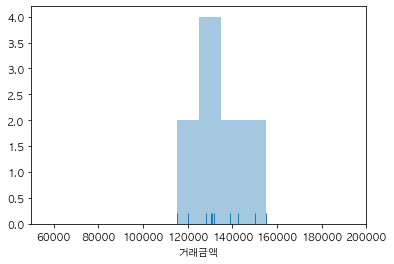

In [185]:
dfPropertyPrice = dfAptTradeTargetProperty['거래금액']
chart = sns.distplot(dfPropertyPrice, kde=False, rug=True)

chart.set_xlim(50000, 200000)

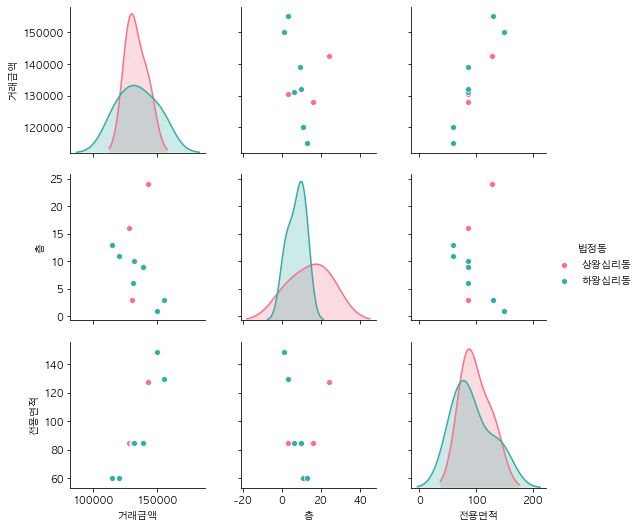

In [192]:
sns.pairplot(
    dfAptTradeTargetProperty, 
    hue="법정동",
    palette="husl",
    vars=['거래금액', '층', '전용면적'])